In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from machine_learning.utils.utils_misc import hard_arg_max, soft_arg_max

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (12, 8)

In [3]:
a = np.array([1, 2, 3])

### testing out hard_arg_max(), soft_arg_max()

In [4]:
hard_arg_max(a)

array([0, 0, 1], dtype=int16)

In [5]:
soft_arg_max(a)

array([0.09003057, 0.24472847, 0.66524096])

### hard arg max of X_0 and 0

In [6]:
n_samples = 100
X_0 = np.linspace(0, 10, n_samples)
X_1 = np.zeros(n_samples)

In [7]:
X = np.vstack([X_0, X_1]).T
X.shape

(100, 2)

In [8]:
hard_arg_maxes = np.array(list(map(hard_arg_max, X)))
hard_arg_maxes[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int16)

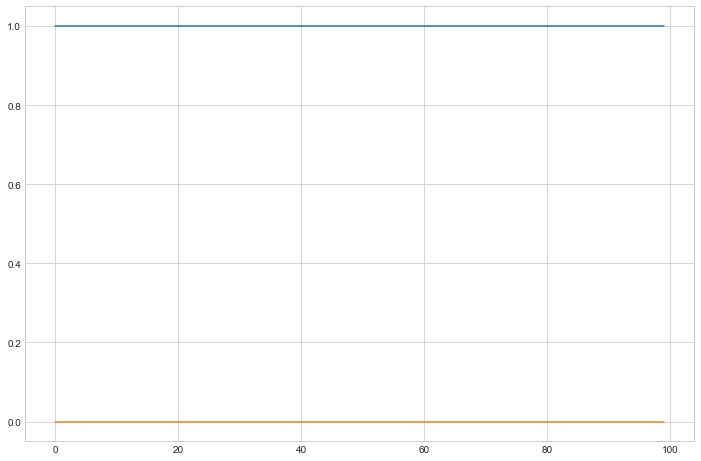

In [9]:
plt.figure(figsize=figsize)
plt.plot(hard_arg_maxes[:, 0])
plt.plot(hard_arg_maxes[:, 1])
plt.show()

### soft arg max of X_0 and 0

In [10]:
soft_arg_maxes = np.array(list(map(soft_arg_max, X)))
soft_arg_maxes[:5]

array([[0.5       , 0.5       ],
       [0.52523108, 0.47476892],
       [0.55033398, 0.44966602],
       [0.57518313, 0.42481687],
       [0.59965802, 0.40034198]])

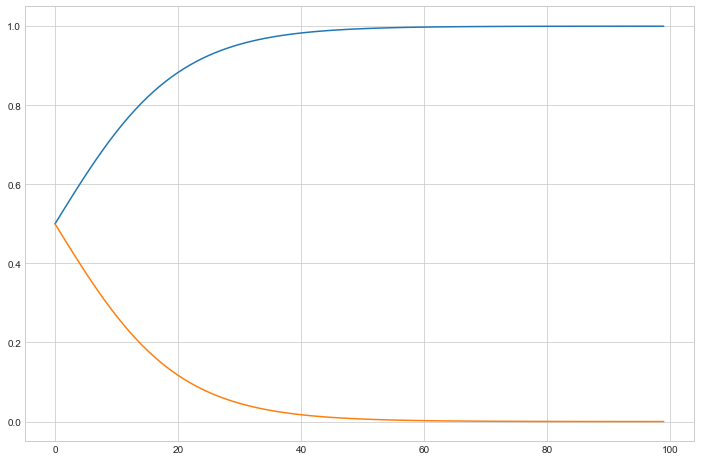

In [11]:
plt.figure(figsize=figsize)
plt.plot(soft_arg_maxes[:, 0])
plt.plot(soft_arg_maxes[:, 1])
plt.show()

### soft arg max of X_0, X_1, X_2 and 0

In [12]:
X_0 = np.linspace(0, 10, n_samples)
X_1 = X_0 / 2**1
X_2 = X_0 / 2**2
X_3 = np.zeros(n_samples)

In [13]:
X = np.vstack([X_0, X_1, X_2, X_3]).T
X.shape

(100, 4)

In [14]:
soft_arg_maxes = np.array(list(map(soft_arg_max, X)))
soft_arg_maxes[:5]

array([[0.25      , 0.25      , 0.25      , 0.25      ],
       [0.26443037, 0.25140694, 0.24513777, 0.23902493],
       [0.27929784, 0.252464  , 0.24002992, 0.22820824],
       [0.29457814, 0.25316188, 0.23469142, 0.21756855],
       [0.31024373, 0.25349345, 0.22913879, 0.20712403]])

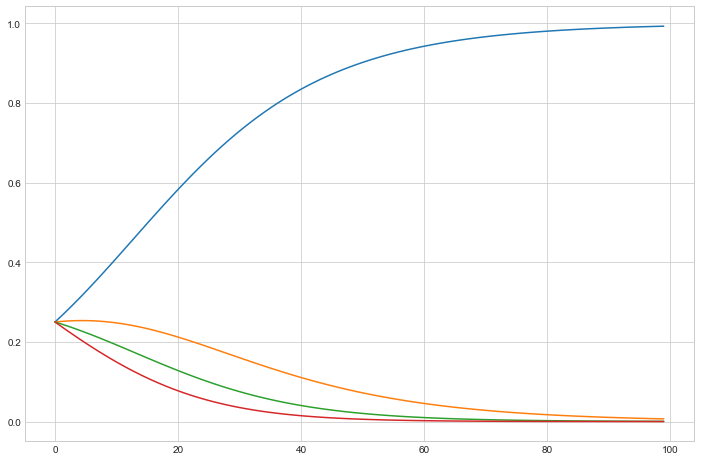

In [15]:
plt.figure(figsize=figsize)
plt.plot(soft_arg_maxes[:, 0])
plt.plot(soft_arg_maxes[:, 1])
plt.plot(soft_arg_maxes[:, 2])
plt.plot(soft_arg_maxes[:, 3])
plt.show()

### soft arg max of X_0, X_1, X_2 and 0
### where t goes to 0 and soft_arg_max goes to hard_arg_max

In [16]:
def soft_arg_max_wrapper_small_t(x):
    t = 0.1
    return soft_arg_max(x, t)

In [17]:
soft_arg_maxes_small_t = np.array(list(map(soft_arg_max_wrapper_small_t, X)))

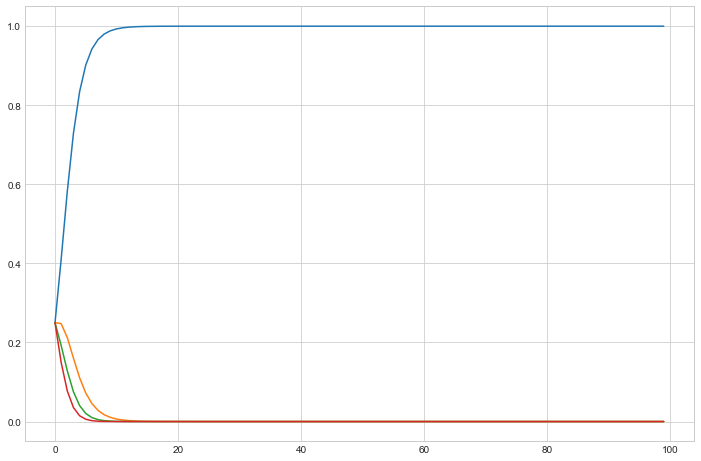

In [18]:
plt.figure(figsize=figsize)
plt.plot(soft_arg_maxes_small_t[:, 0])
plt.plot(soft_arg_maxes_small_t[:, 1])
plt.plot(soft_arg_maxes_small_t[:, 2])
plt.plot(soft_arg_maxes_small_t[:, 3])
plt.show()

### soft arg max of X_0, X_1, X_2 and 0
### where t goes to inf and soft_arg_max goes to uniform [1/4, ... , 1/4]

In [19]:
def soft_arg_max_wrapper_big_t(x):
    t = 50
    return soft_arg_max(x, t)

In [20]:
soft_arg_maxes_big_t = np.array(list(map(soft_arg_max_wrapper_big_t, X)))

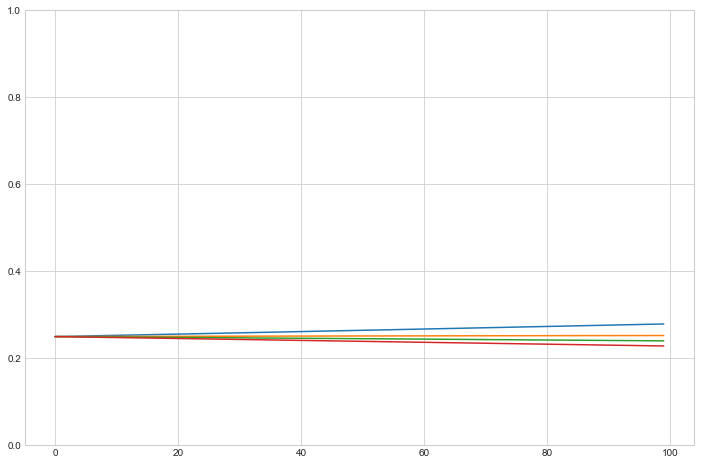

In [21]:
plt.figure(figsize=figsize)
plt.plot(soft_arg_maxes_big_t[:, 0])
plt.plot(soft_arg_maxes_big_t[:, 1])
plt.plot(soft_arg_maxes_big_t[:, 2])
plt.plot(soft_arg_maxes_big_t[:, 3])
plt.ylim(0, 1)
plt.show()